In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

In [2]:
data = pd.read_csv('./creditcard_train.csv')

In [3]:
data.shape

(227789, 32)

In [4]:
data.columns

Index(['Id', 'Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [54]:
data.head()

,Id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [55]:
data['log_amount'] = np.log(data['Amount'] + 1)

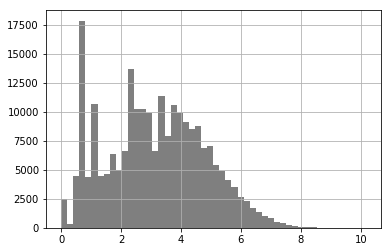

In [56]:
data['log_amount'].hist(color='k', alpha=0.5, bins=50)

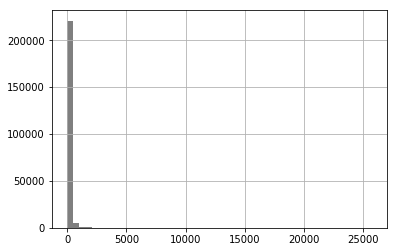

In [57]:
data['Amount'].hist(color='k', alpha=0.5, bins=50)

In [5]:
def NB_classify(drop_var):
    clf = BernoulliNB()
    scores = cross_val_score(clf, data.drop(drop_var, axis=1),data['Class'], scoring='f1',cv=5)
    return np.mean(scores)

feature_importance = {}
for var in data.columns:
    score = NB_classify(['Class', var])
    feature_importance[var] = score

print(sorted(feature_importance.items(), key=lambda x: x[1]))

[('V3', 0.6538303531323871), ('V12', 0.6598577253912827), ('V14', 0.6615371382455645), ('V4', 0.6718771381761739), ('V11', 0.6735829631130319), ('V7', 0.6737500719696561), ('V16', 0.6855366842734596), ('V2', 0.6951504643747333), ('V10', 0.6957719885667619), ('V17', 0.7040041997254552), ('V6', 0.7054372046866123), ('V20', 0.7085890959282264), ('V26', 0.7089248127045809), ('V9', 0.709624081104209), ('Id', 0.7106385543738922), ('Time', 0.7106385543738922), ('V22', 0.7106385543738922), ('Class', 0.7106385543738922), ('V21', 0.7133384750147516), ('V15', 0.7143158799552876), ('V23', 0.7144049585733673), ('V25', 0.7144049585733673), ('V24', 0.7152010728725641), ('V13', 0.7155768259788304), ('Amount', 0.7171257869480813), ('V27', 0.7189674983362953), ('V28', 0.7202637751569363), ('V8', 0.7212647135366671), ('V1', 0.72194787561824), ('V19', 0.7248685046441963), ('V18', 0.7259219240910676), ('V5', 0.7295074336702888)]


In [6]:
data.head()

,Id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


UnderSample

In [60]:
def undersample(data, ratio):
    fraud = data[data.Class == 1]
    non_fraud = data[data.Class == 0]
    random_normal_indices = np.random.choice(np.array((non_fraud).index), len(fraud)* ratio, replace=False)
    after_index = np.concatenate([fraud.index, random_normal_indices])
    
    under_sample_data = data.iloc[after_index,:]
    return under_sample_data

In [61]:
train_data = undersample(data, 250)

In [62]:
train_data.head()

,Id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,log_amount
484,623,472,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,...,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.0,1,6.272877
4888,6108,6986,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,...,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.0,1,4.094345
5062,6329,7519,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,...,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.0,1,0.693147
5064,6331,7526,0.008430,4.137837,-6.240697,6.675732,0.768307,-3.353060,-1.631735,0.154612,...,-0.608057,-0.539528,0.128940,1.488481,0.507963,0.735822,0.513574,1.0,1,0.693147
5067,6334,7535,0.026779,4.132464,-6.560600,6.348557,1.329666,-2.513479,-1.689102,0.303253,...,-0.576752,-0.669605,-0.759908,1.605056,0.540675,0.737040,0.496699,1.0,1,0.693147


In [109]:
sample_new_data = train_data.drop(['Time','Id','V5','log_amount','Amount','Class'], axis=1)
y = train_data['Class']

# clf = BernoulliNB()
# clf = RandomForestClassifier(n_jobs = -1)
clf = LogisticRegression()
# clf.fit(train_data,y)

In [116]:
from sklearn.model_selection import GridSearchCV
# pprint(clf.get_params())
param_grid = {
    'penalty':['l1','l2'],
    'class_weight':['balanced', None],
    'C': [0.1,1,10]
}
clf1 = GridSearchCV(estimator = clf, param_grid = param_grid, scoring='f1', verbose=1, n_jobs=-1)
clf1.fit(sample_new_data, y)
best_params = clf1.best_params_
print('best parameters is ', best_params)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:   39.2s finished


best parameters is  {'C': 1, 'class_weight': None, 'penalty': 'l2'}


In [100]:
X_train,X_test,y_train,y_test = train_test_split(sample_new_data, y, test_size=0.3,random_state=33)

In [101]:
X_train.columns

Index(['V1', 'V2', 'V3', 'V4', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12',
       'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22',
       'V23', 'V24', 'V25', 'V26', 'V27', 'V28'],
      dtype='object')

In [110]:
clf1.fit(X_train,y_train)
pred = clf.predict(X_test)
metrics.f1_score(y_test, pred)

0.831858407079646

In [111]:
metrics.recall_score(y_test, pred)

0.7768595041322314

In [105]:
dt = pd.read_csv('./creditcard_test.csv')

In [106]:
dt = dt.drop(['Time','Id','V5','Amount'], axis=1)

In [83]:
dt.head()

,V1,V2,V3,V4,V6,V7,V8,V9,V10,V11,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.384978,0.616109,-0.874300,-0.094019,3.317027,0.470455,0.538247,-0.558895,0.309755,-0.259116,...,0.125992,0.049924,0.238422,0.009130,0.996710,-0.767315,-0.492208,0.042472,-0.054337,9.99
1,-0.436905,0.918966,0.924591,-0.727219,-0.127867,0.707642,0.087962,-0.665271,-0.737980,0.324098,...,-0.047021,-0.194796,-0.672638,-0.156858,-0.888386,-0.342413,-0.049027,0.079692,0.131024,0.89
2,-5.401258,-5.450148,1.186305,1.736239,-1.763406,-1.559738,0.160842,1.233090,0.345173,0.917230,...,-2.196848,-0.503600,0.984460,2.458589,0.042119,-0.481631,-0.621272,0.392053,0.949594,46.80
3,0.694885,-1.361819,1.029221,0.834159,1.309109,-0.878586,0.445290,-0.446196,0.568521,1.019151,...,-0.138334,-0.295583,-0.571955,-0.050881,-0.304215,0.072001,-0.422234,0.086553,0.063499,231.71
4,1.322707,-0.174041,0.434555,0.576038,-0.831083,-0.264905,-0.220982,-1.071425,0.868559,-0.641506,...,-0.522951,-0.284376,-0.323357,-0.037710,0.347151,0.559639,-0.280158,0.042335,0.028822,16.00


In [112]:
pre_test = clf.predict(dt)

In [113]:
len([i for i in pre_test if i == 1])

90